### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

### Load the Data

In [2]:
df = pd.read_csv('../data/telco-churn-data.csv')

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Descriptive Analytics

In [3]:
# Basic statistics
print("Dataset Info:")
print(f"Total customers: {len(df)}")
print(f"Total features: {df.shape[1]}")
print(f"\nChurn Distribution:")
print(df['Churn'].value_counts())
print(f"\nChurn Rate: {df['Churn'].value_counts(normalize=True)['Yes']:.2%}")

Dataset Info:
Total customers: 7043
Total features: 21

Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Rate: 26.54%


#### Data Cleaning

In [4]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

print("\n" + "="*50)

# Check data types (notice TotalCharges is 'object' not numeric)
print("\nData types")
df.dtypes

Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Data types


customerID              str
gender                  str
SeniorCitizen         int64
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges            str
Churn                   str
dtype: object

Because I see "TotalCharges" column as str, when it should be float64, I checked the column values, and saw that some values are Blank, so we will check what is going on with these rows. 

In [5]:
blank_charges = df[df['TotalCharges'].str.strip() == '']

print(f"Number of blank TotalCharges: {len(blank_charges)}")
print("\nThese customers:")
print(blank_charges[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']])

Number of blank TotalCharges: 11

These customers:
      customerID  tenure  MonthlyCharges TotalCharges
488   4472-LVYGI       0           52.55             
753   3115-CZMZD       0           20.25             
936   5709-LVOEQ       0           80.85             
1082  4367-NUYAO       0           25.75             
1340  1371-DWPAZ       0           56.05             
3331  7644-OMVMY       0           19.85             
3826  3213-VVOLG       0           25.35             
4380  2520-SGTTA       0           20.00             
5218  2923-ARZLG       0           19.70             
6670  4075-WKNIU       0           73.35             
6754  2775-SEFEE       0           61.90             


Because these customers have a tenure of 0, means they have never been charged, which is why understandbly the Total Charges are Blank. We are going to replace these blanks with 0. 

In [6]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [7]:
print("TotalCharges data type now:", df['TotalCharges'].dtype)
print("\nDescriptive stats:")
print(df['TotalCharges'].describe())

TotalCharges data type now: float64

Descriptive stats:
count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64


### Visualizations

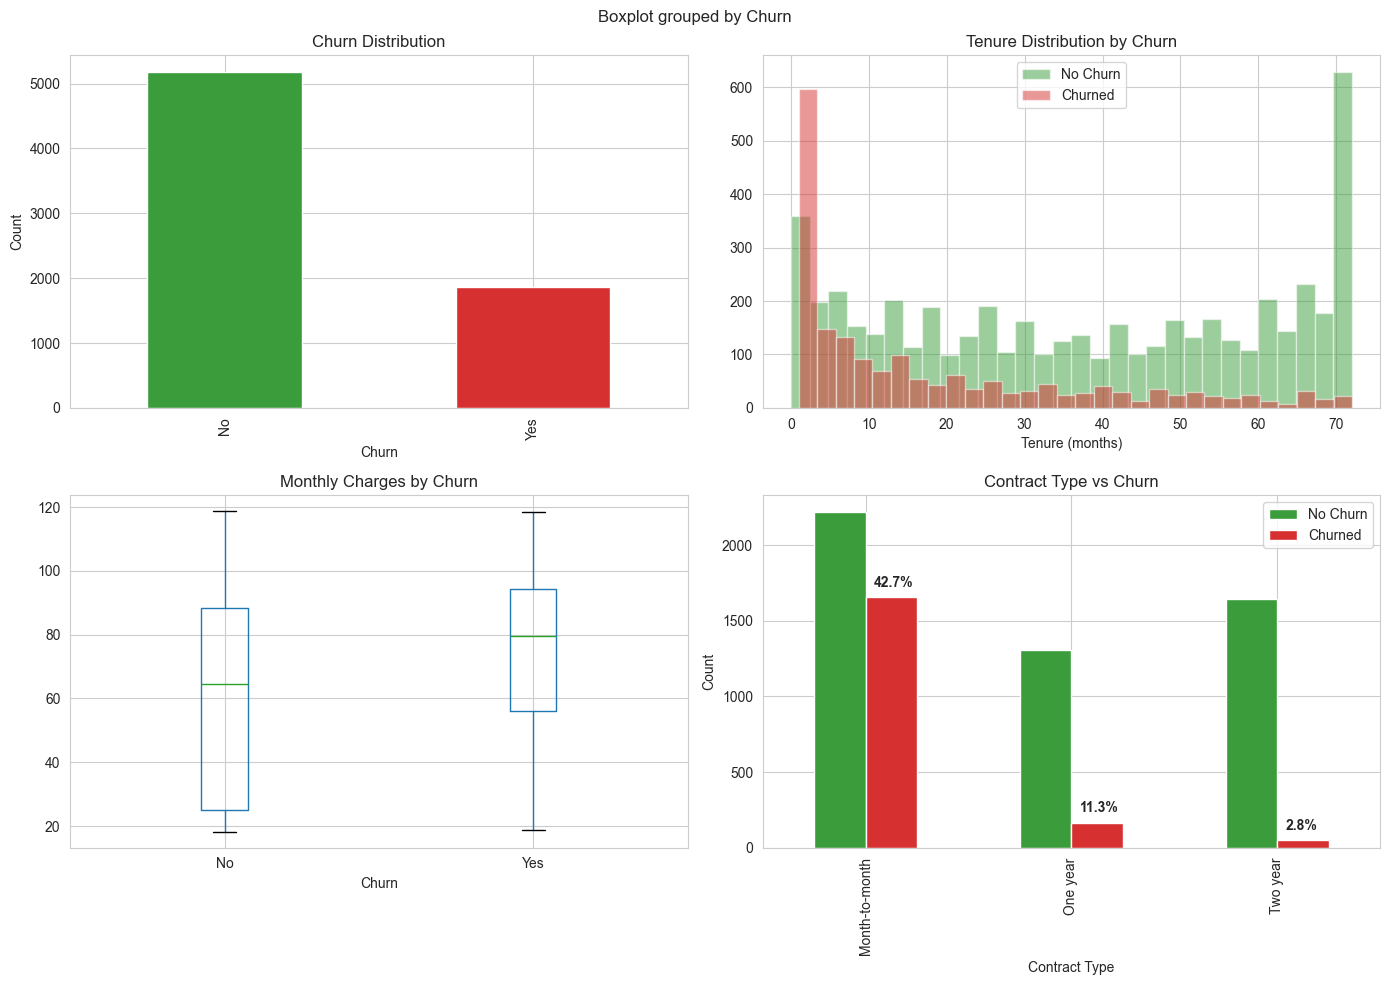

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Churn distribution
df['Churn'].value_counts().plot(kind='bar', ax=axes[0,0], color=['#3a9c3a', '#d63030'])
axes[0,0].set_title('Churn Distribution')
axes[0,0].set_xlabel('Churn')
axes[0,0].set_ylabel('Count')

# 2. Tenure distribution by churn
df[df['Churn']=='No']['tenure'].hist(ax=axes[0,1], bins=30, alpha=0.5, label='No Churn', color='#3a9c3a')
df[df['Churn']=='Yes']['tenure'].hist(ax=axes[0,1], bins=30, alpha=0.5, label='Churned', color='#d63030')
axes[0,1].set_title('Tenure Distribution by Churn')
axes[0,1].set_xlabel('Tenure (months)')
axes[0,1].legend()

# 3. Monthly Charges by churn
df.boxplot(column='MonthlyCharges', by='Churn', ax=axes[1,0])
axes[1,0].set_title('Monthly Charges by Churn')
axes[1,0].set_xlabel('Churn')

# 4. Contract type vs Churn with percentages
contract_churn = pd.crosstab(df['Contract'], df['Churn'])
ax = contract_churn.plot(kind='bar', ax=axes[1,1], color=['#3a9c3a', '#d63030'])
axes[1,1].set_title('Contract Type vs Churn')
axes[1,1].set_xlabel('Contract Type')
axes[1,1].set_ylabel('Count')
axes[1,1].legend(['No Churn', 'Churned'])

# Churn% labels
for i, contract in enumerate(contract_churn.index):
    total = contract_churn.loc[contract].sum()
    churned = contract_churn.loc[contract, 'Yes']
    churn_pct = (churned / total) * 100
    
    bar_height = churned
    bar_position = i+0.04
    
    axes[1,1].text(bar_position, bar_height + 50, f'{churn_pct:.1f}%', 
                   ha='left', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

In [9]:
# Save the cleaned dataset for later use
df.to_csv('../data/telco-churn-cleaned.csv', index=False)
print("Cleaned data saved!")

Cleaned data saved!
